### import necessary packages

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

In [191]:

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,classification_report,ConfusionMatrixDisplay
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from yellowbrick.text import FreqDistVisualizer
from wordcloud import WordCloud

### import data

In [50]:
data = pd.read_csv(r"H:\Data_Science_internship\Assignments-Internship\SMS spam detection\spam.csv",encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [52]:
data.shape

(5572, 5)

In [53]:
#DROP UNNECESSARY COLUMNS
data = data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [54]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
# RENAME THE COLUMNS
data.rename(columns = {'v1':'Label', 'v2':'Massages'}, inplace = True)
data.head(2)

,Label,Massages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [56]:
data['Label'].value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

In [35]:
total = len(data)
total

5572

In [38]:
spam = len(data[data['Label'] == 'spam'] )
spam

747

In [40]:
ham = len(data[data['Label']=='ham'])
ham

4825

In [41]:
persentage = (spam/total)*100
print("Total persentage of spam is :",persentage)

Total persentage of spam is : 13.406317300789663


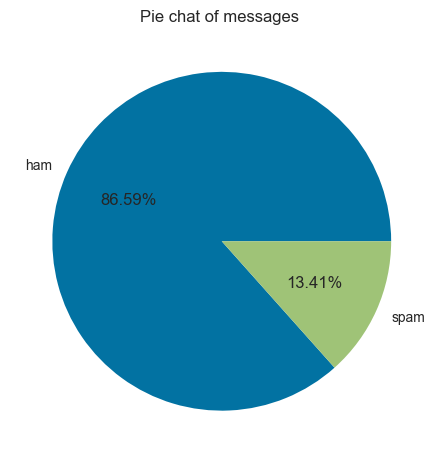

In [42]:
class_data = [4825,747]
class_lebel = ['ham','spam']

# Plotting data on chart
plt.pie(class_data, labels=class_lebel, autopct='%.2f%%')

# Add title to the chart
plt.title('Pie chat of messages ')

# Displaying chart
plt.show()

### Data cleaning

In [44]:
import nltk 
from nltk import *

In [46]:
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anike\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [57]:
data.head()

,Label,Massages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
sentences = list(np.array(data["Massages"]))
sentences[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [64]:
lem = WordNetLemmatizer() 

In [65]:
preprocessed_sentences =[]
def preprocess(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split(): 
        token = lem.lemmatize(token,"v") #lemmatizing 
        if token not in stop_words: #remove stop_words
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

for line in sentences:
    preprocessed_line = preprocess(line)
    preprocessed_sentences.append(preprocessed_line)
list(np.array(preprocessed_sentences))

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joke wif u oni',
 'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'freemsg hey darling 3 week word back like fun still tb ok xxx std chgs send 1 50 rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune',
 'winner value network customer select receivea 900 prize reward claim call 09061701461 claim code kl341 valid 12 hours',
 'mobile 11 months u r entitle update latest colour mobiles camera free call mobile update co free 08002986030',
 'gonna home soon want talk stuff anymore tonight k cry enough today',
 'six chance win cash 100 20 000 pound txt csh11 send 87575 cost 150p day 6days 16 tsandcs apply reply hl

In [66]:
data['Preprocessed_Massages'] = preprocessed_sentences

In [67]:
data.head(3)

,Label,Massages,Preprocessed_Massages
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...


### Tokenization

In [68]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Preprocessed_Massages'])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 7525


In [69]:
list(word_index)[0:10]

['u', 'get', 'call', 'go', '2', 'ur', 'come', '4', 'gt', 'lt']

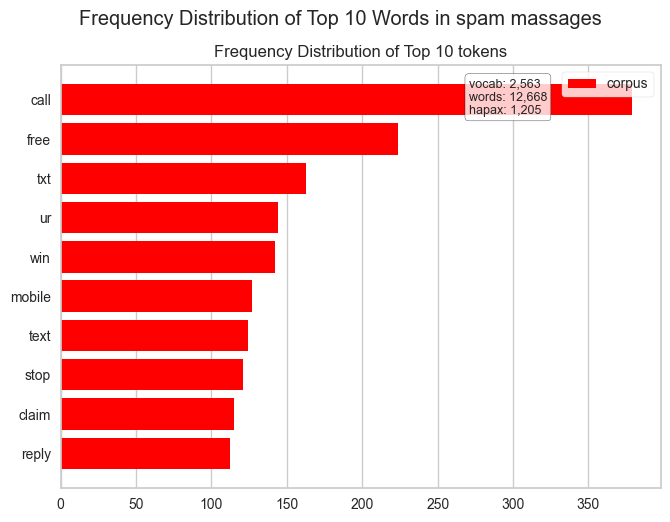

In [108]:
#SPAM
spam_plot = data.loc[data['Label'] == 'spam', ['Preprocessed_Massages']]
spam_plotlist = [x for x in spam_plot['Preprocessed_Massages'].str.split()]
spam_plotlist = list(itertools.chain(*spam_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(spam_plotlist)
features   = count.get_feature_names_out()


plt.suptitle('Frequency Distribution of Top 10 Words in spam massages')
plt.yticks()
plt.xticks()
plt.gcf().subplots_adjust(left=0.15)

visualizer = FreqDistVisualizer(features = features, n=10, orient='h',color = 'red')
visualizer.fit(docs)
visualizer.show()
plt.show()

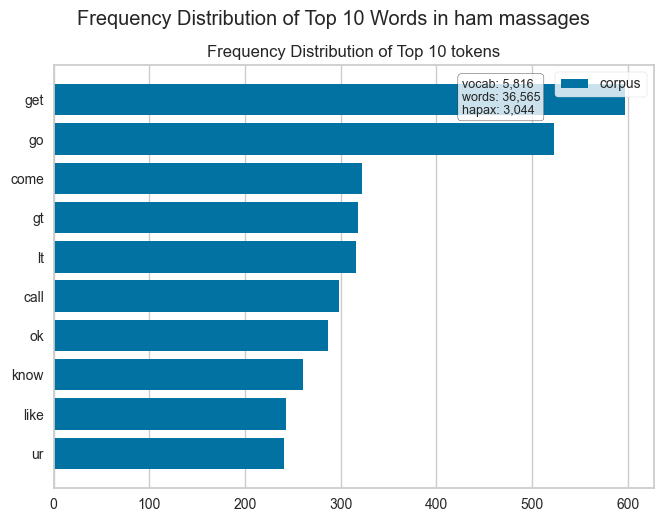

In [109]:
#HAM
ham_plot = data.loc[data['Label'] == 'ham', ['Preprocessed_Massages']]
ham_plotlist = [x for x in ham_plot['Preprocessed_Massages'].str.split()]
ham_plotlist = list(itertools.chain(*ham_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(ham_plotlist)
features   = count.get_feature_names_out()


plt.suptitle('Frequency Distribution of Top 10 Words in ham massages')
plt.yticks()
plt.xticks()
plt.gcf().subplots_adjust(left=0.15)

visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()
plt.show()

### TD-IDF vectorization

In [77]:
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(data['Preprocessed_Massages'])
Y = data['Label']

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = data['Preprocessed_Massages'] 

#create TfidVectorizer object
tfidf = TfidfVectorizer()

#compute a sparse matrix of word vectors for the corpus
tfidf_matrix = tfidf.fit_transform(corpus)

#display property of sparse matrix 
tfidf_matrix

# convert this sparse matrix to a dense numpy array , so that we can create a data frame for display purposes only
df = pd.DataFrame(tfidf_matrix.toarray(),columns = tfidf.get_feature_names_out())
print(df)

       00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
1     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
2     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
3     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
4     0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
...   ...  ...     ...           ...   ...   ...          ...          ...   
5567  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5568  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5569  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5570  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   
5571  0.0  0.0     0.0           0.0   0.0   0.0          0.0          0.0   

      0125698789   02  ...  zebra  zed  zero  zhong  zindgi  zo

In [79]:
from sklearn.metrics.pairwise import cosine_similarity
#to see similerities 
corpus = data['Preprocessed_Massages'] 

#create TfidfVectorizer
tfidf = TfidfVectorizer()

#compute a sparse matrix of word vectors for the corpus 
tfidf_matrix = tfidf.fit_transform(corpus)

#compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
print(cosine_sim)

[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.02312794 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.02312794 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


### Train-Test Split

In [80]:
train_data, test_data = train_test_split( data, test_size=0.3,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 3900
Test Data size 1672


In [81]:
print(X[0:3])

  (0, 940)	0.34001721120245443
  (0, 976)	0.411632596595713
  (0, 367)	0.3361599574450456
  (0, 93)	0.455170952789604
  (0, 217)	0.47127532074856576
  (0, 658)	0.41552660601514085
  (1, 958)	0.5403695936884475
  (1, 453)	0.5749835180642761
  (1, 469)	0.5111949890878651
  (1, 610)	0.3406968436937271
  (2, 328)	0.2699264051977394
  (2, 82)	0.2412294698954004
  (2, 688)	0.2435677344623184
  (2, 886)	0.17937011255867316
  (2, 805)	0.2837677763844269
  (2, 681)	0.23796140740301355
  (2, 696)	0.23304910833856038
  (2, 839)	0.17749969519564326
  (2, 315)	0.26550640602353415
  (2, 961)	0.17961022829169798
  (2, 192)	0.2805869565898932
  (2, 970)	0.2749002674548477
  (2, 288)	0.5193610514754778
  (2, 326)	0.1664115508908383


In [82]:
print(Y[0:3])

0     ham
1     ham
2    spam
Name: Label, dtype: object


In [83]:
print("Shape of x_data ",X.shape)
print("Shape of y_data ",Y.shape)

Shape of x_data  (5572, 1000)
Shape of y_data  (5572,)


In [84]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [86]:
print("Total sample in x_train : ",X_train.shape[0],"\nTotal sample in x_test : ",X_test.shape[0],"\nTotal sample of y_train : ",Y_train.shape[0],"\nTotal sample of y_test : ",Y_test.shape[0])

Total sample in x_train :  3900 
Total sample in x_test :  1672 
Total sample of y_train :  3900 
Total sample of y_test :  1672


### Model 1: Logistic Regression

In [178]:
model1=LogisticRegression(C=1.0,random_state=7)

In [179]:
model1.fit(X_train,Y_train)

LogisticRegression(random_state=7)

In [180]:
Y_pred1 = model1.predict(X_test)

In [181]:
model1_acc = accuracy_score(Y_test,Y_pred1)
print ("Accuracy (Logistic Regression) = ",model1_acc*100)

Accuracy (Logistic Regression) =  97.48803827751196


### Model 2: Naive bayes

In [100]:
model2 = MultinomialNB(alpha = 0.01)

In [101]:
model2.fit(X_train,Y_train)

MultinomialNB(alpha=0.01)

In [102]:
Y_pred2 = model2.predict(X_test)

In [103]:
model2_acc = accuracy_score(Y_test,Y_pred2)
print ("Accuracy (Naive bayes) = ",model2_acc*100)

Accuracy (Naive bayes) =  98.14593301435407


### Model 3: Support Vector

In [114]:
model3 = SVC()

In [115]:
model3.fit(X_train,Y_train)

SVC()

In [116]:
Y_pred3 = model3.predict(X_test)

In [117]:
model3_acc = accuracy_score(Y_test,Y_pred3)
print ("Accuracy (Support Vector) = ",model3_acc*100)

Accuracy (Support Vector) =  98.50478468899522


### Model 4: KNN classification

In [118]:
model4 = KNeighborsClassifier(n_neighbors = 7)

In [119]:
model4.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [120]:
Y_pred4 = model4.predict(X_test)

In [121]:
model4_acc = accuracy_score(Y_test,Y_pred4)
print ("Accuracy (KNN classification) = ",model4_acc*100)

Accuracy (KNN classification) =  91.32775119617224


### Model 5: Random Forest

In [192]:
model5 = RandomForestClassifier()

In [193]:
model5.fit(X_train,Y_train)

RandomForestClassifier()

In [194]:
Y_pred5 = model5.predict(X_test)

In [195]:
model5_acc = accuracy_score(Y_test,Y_pred5)
print ("Accuracy (Random Forest) = ",model5_acc*100)

Accuracy (Random Forest) =  98.26555023923444


In [196]:
results = pd.DataFrame({"Model":["Logistic_Regression","Naive bayes","Support Vector","KNN_Classifier","Random Forest"],"Accuracy":[model1_acc*100,model2_acc*100,model3_acc*100,model4_acc*100,model5_acc*100]})
results

,Model,Accuracy
0,Logistic_Regression,97.488038
1,Naive bayes,98.145933
2,Support Vector,98.504785
3,KNN_Classifier,91.327751
4,Random Forest,98.265550


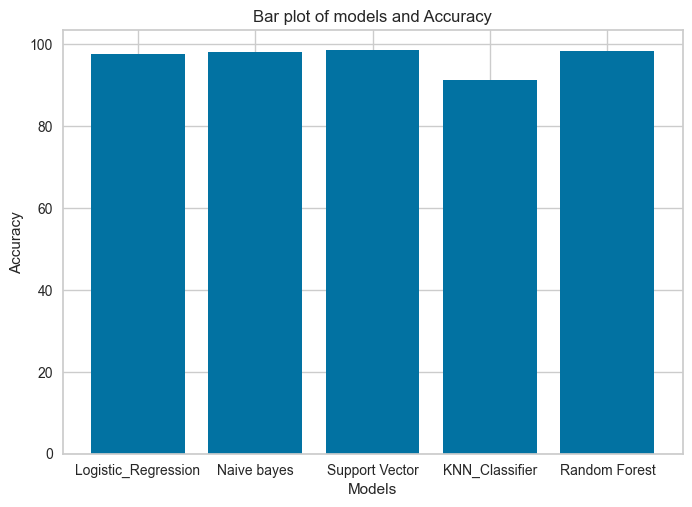

In [197]:
fig, ax = plt.subplots()
ax.bar(results['Model'],results['Accuracy'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Bar plot of models and Accuracy")
plt.show()

### Test Model with input data

In [211]:
X_input = ['ACTION REQUIRED. Please verify your Bank of America account information to avoid a hold on your account. Click here to confirm','Our records indicate that you have overpaid for (a product or service). Please provide us with your bank routing and account number to expedite your refund.','Your Wells Fargo account has been temporarily locked due to possible suspicious activity. Please log in here and promptly verify your information for security purposes.','Your Apple ID has been identified as a possible security breach. To protect your account, please verify your Apple ID and password here: [link]','Your Apple ID has been identified as a possible security breach. To protect your account, please verify your Apple ID and password here: [link]','This is an emergency. Your brother needs help. He has been taken hostage, and the ransom to free him is $2,000. Wire money ASAP',"I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.","Yeah he got in at 2 and was v apologetic. n had fallen out and she was actin like spoilt child and he got caught up in that. Till 2! But we won't go there! Not doing too badly cheers. You? ","Hello! How's you and how did saturday go? I was just texting to see if you'd decided to do anything tomo. Not that i'm trying to invite myself or anything!","07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow","07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow","As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a å£1500 Bonus Prize, call 09066364589","For real when u getting on yo? I only need 2 more tickets and one more jacket and I'm done. I already used all my multis.","Please don't text me anymore. I have nothing else to say.","As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"]

In [212]:
X_input

['ACTION REQUIRED. Please verify your Bank of America account information to avoid a hold on your account. Click here to confirm',
 'Our records indicate that you have overpaid for (a product or service). Please provide us with your bank routing and account number to expedite your refund.',
 'Your Wells Fargo account has been temporarily locked due to possible suspicious activity. Please log in here and promptly verify your information for security purposes.',
 'Your Apple ID has been identified as a possible security breach. To protect your account, please verify your Apple ID and password here: [link]',
 'Your Apple ID has been identified as a possible security breach. To protect your account, please verify your Apple ID and password here: [link]',
 'This is an emergency. Your brother needs help. He has been taken hostage, and the ransom to free him is $2,000. Wire money ASAP',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help f

In [213]:
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 30), stop_words='english')
X = vectorizer.fit_transform(X_input)


In [221]:
Y_output = model5.predict(X)
Y_output

array(['spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam',
       'spam', 'spam', 'spam', 'ham', 'ham', 'ham'], dtype=object)